## REGRESIÓN MULTILINEAL

Es posible hallar una función lineal respecto a cada una de las variables independientes

$$ y = \beta_0 + \beta_1x1 +\beta_2 x2 + \beta_3 x3 ... \beta_n xn$$

#### Evaluación de los supuestos del modelo
En el contexto del análisis lineal, la evaulación de los supuestos del modelo de Regresión Múltiple es un paso crítico para asegurarse de que el modelo se ajuste adecuadamente a los datos y que los resultados sean válidos y confiables.

- **Linealidad:** Cada una de las variables independientes será lineal con respecto a la variable dependiete. Se verifica con gráfica de dispersión o mediante prueblas estadísticas.

- **Homocedasticidad**
Residuso(Diferencia entre la distancia del valor esperado y el valor real)
La dispersión de esos residuos debe ser constante en todos los niveles de las variables independientes. Se puede evaluar mediante gráficos de residuos

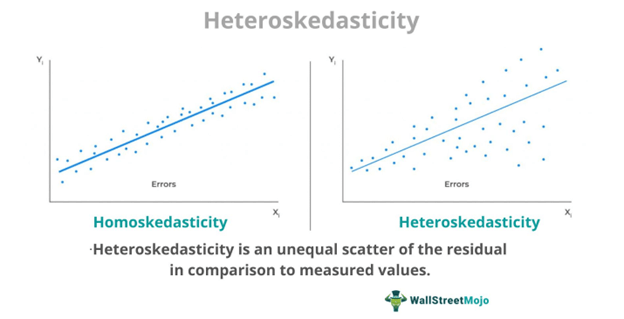



- **Independencia de los residuos**
Los residuops no deben mostrar patrones sistemáticos o autocorrelación temporal. Se puede verificar mediante pruebas de autocorrelación.

- **Normalidad de los residuos** 
Los residuos deben seguir una distribución normal. Se evalua mediante prubas estadísticas o gráficos de normalidad.

- **Ausencia de multicolinealidad**
Las variables independientes deben ser independientes entre sí. La multicolinealidad puede afectar la interpretación de los coeficinetes. Se puede evaluar mediante pruebas estadísticas y el cálculo de la matriz de correlación.